In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [4]:
data_dir = Path('../input/')
feature_dir = Path('../feature/')
val_dir = Path('../txt')
tst_dir = Path('../txt')
sub_dir = Path('../submission')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = sub_dir / 'sample_submission.csv'

target_col = 'class'
n_fold = 5
n_class = 3
seed = 42

In [5]:
algo_name = 'lrcv'
feature_name = 'polyfeature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
p_val_file = val_dir / f'{model_name}.val.csv'
p_tst_file = tst_dir / f'{model_name}.tst.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [6]:
df = pd.read_csv(feature_dir / 'feature.csv', index_col=0)
print(df.shape)
df.head()

(400000, 26)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,g_r,u_g,r_i,i_z,u_r,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ug,d_dered_gr,d_dered_iz,d_dered_ur,d_dered_ri,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,1.3723,1.1898,0.0,1.3273,2.9272,1.3371,0.7328,4.2545,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,2.8665,1.3027,0.7232,4.1691,1.3230,2.1456
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.5266,1.2533,1.0,0.6096,0.9902,0.1840,0.0995,1.5997,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,0.9619,0.5931,0.1016,1.5550,0.1751,1.3163
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,0.7413,1.0225,0.0,0.2891,0.9610,0.1428,0.0435,1.2501,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,0.9211,0.2466,0.0257,1.1676,0.1183,1.4821
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,0.9591,1.2054,0.0,0.9676,4.4719,0.3262,0.2603,5.4395,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,4.3590,0.9074,0.2395,5.2664,0.2926,1.4454
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,1.2917,1.1939,0.0,1.6568,3.7543,0.7182,0.3415,5.4111,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,3.3376,1.5709,0.3144,4.9084,0.6727,1.9857


In [7]:
scaler = StandardScaler()
poly = PolynomialFeatures(2)
X = poly.fit_transform(scaler.fit_transform(df.drop(target_col, axis=1)))
feature_names = poly.get_feature_names(df.columns)
feature_names

['1',
 'z',
 'redshift',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'nObserve',
 'airmass_u',
 'class',
 'g_r',
 'u_g',
 'r_i',
 'i_z',
 'u_r',
 'd_dered_u',
 'd_dered_g',
 'd_dered_r',
 'd_dered_i',
 'd_dered_z',
 'd_dered_ug',
 'd_dered_gr',
 'd_dered_iz',
 'd_dered_ur',
 'd_dered_ri',
 'z^2',
 'z redshift',
 'z dered_u',
 'z dered_g',
 'z dered_r',
 'z dered_i',
 'z dered_z',
 'z nObserve',
 'z airmass_u',
 'z class',
 'z g_r',
 'z u_g',
 'z r_i',
 'z i_z',
 'z u_r',
 'z d_dered_u',
 'z d_dered_g',
 'z d_dered_r',
 'z d_dered_i',
 'z d_dered_z',
 'z d_dered_ug',
 'z d_dered_gr',
 'z d_dered_iz',
 'z d_dered_ur',
 'z d_dered_ri',
 'redshift^2',
 'redshift dered_u',
 'redshift dered_g',
 'redshift dered_r',
 'redshift dered_i',
 'redshift dered_z',
 'redshift nObserve',
 'redshift airmass_u',
 'redshift class',
 'redshift g_r',
 'redshift u_g',
 'redshift r_i',
 'redshift i_z',
 'redshift u_r',
 'redshift d_dered_u',
 'redshift d_dered_g',
 'redshift d_dered_r',
 're

In [8]:
df_poly = pd.DataFrame(data=X, columns=feature_names, index=df.index)
df_poly[target_col] = df[target_col]
df_poly.head()
df_poly.to_csv(feature_file)

In [9]:
del df_poly, df

In [10]:

df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()


(400000, 351)


,1,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,g_r,u_g,r_i,i_z,u_r,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ug,d_dered_gr,d_dered_iz,d_dered_ur,d_dered_ri,z^2,z redshift,z dered_u,z dered_g,z dered_r,z dered_i,z dered_z,z nObserve,z airmass_u,z class,z g_r,z u_g,z r_i,z i_z,z u_r,z d_dered_u,z d_dered_g,z d_dered_r,z d_dered_i,z d_dered_z,z d_dered_ug,z d_dered_gr,z d_dered_iz,z d_dered_ur,...,d_dered_u d_dered_ug,d_dered_u d_dered_gr,d_dered_u d_dered_iz,d_dered_u d_dered_ur,d_dered_u d_dered_ri,d_dered_g^2,d_dered_g d_dered_r,d_dered_g d_dered_i,d_dered_g d_dered_z,d_dered_g d_dered_ug,d_dered_g d_dered_gr,d_dered_g d_dered_iz,d_dered_g d_dered_ur,d_dered_g d_dered_ri,d_dered_r^2,d_dered_r d_dered_i,d_dered_r d_dered_z,d_dered_r d_dered_ug,d_dered_r d_dered_gr,d_dered_r d_dered_iz,d_dered_r d_dered_ur,d_dered_r d_dered_ri,d_dered_i^2,d_dered_i d_dered_z,d_dered_i d_dered_ug,d_dered_i d_dered_gr,d_dered_i d_dered_iz,d_dered_i d_dered_ur,d_dered_i d_dered_ri,d_dered_z^2,d_dered_z d_dered_ug,d_dered_z d_dered_gr,d_dered_z d_dered_iz,d_dered_z d_dered_ur,d_dered_z d_dered_ri,d_dered_ug^2,d_dered_ug d_dered_gr,d_dered_ug d_dered_iz,d_dered_ug d_dered_ur,d_dered_ug d_dered_ri,d_dered_gr^2,d_dered_gr d_dered_iz,d_dered_gr d_dered_ur,d_dered_gr d_dered_ri,d_dered_iz^2,d_dered_iz d_dered_ur,d_dered_iz d_dered_ri,d_dered_ur^2,d_dered_ur d_dered_ri,d_dered_ri^2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0002,-0.1093,1.8170,0.1270,0.9086,0.0208,0.0011,1.5879,0.1200,0.0,0.0526,0.0170,0.0202,1.8876,0.1203,0.0063,0.1783,-0.0002,0.0008,0.0928,0.0432,0.0156,2.0425,0.0389,1.6489,3.4181e-08,-2.0203e-05,0.0003,2.3488e-05,0.0002,3.8455e-06,2.0594e-07,0.0003,2.2191e-05,4.4896e-06,9.7243e-06,3.1515e-06,3.7322e-06,0.0003,2.2235e-05,1.1669e-06,3.2960e-05,-3.7490e-08,1.4942e-07,1.7150e-05,7.9847e-06,2.8794e-06,0.0004,7.1979e-06,...,2.7258e-04,9.8297e-05,0.0129,2.4572e-04,0.0104,0.0318,-3.6150e-05,1.4408e-04,0.0165,0.0077,2.7766e-03,0.3641,0.0069,0.2940,4.1119e-08,-1.6389e-07,-1.8810e-05,-8.7576e-06,-3.1582e-06,-4.1417e-04,-7.8946e-06,-0.0003,6.5318e-07,7.4970e-05,3.4905e-05,1.2587e-05,0.0017,3.1465e-05,1.3327e-03,0.0086,4.0062e-03,1.4447e-03,0.1895,0.0036,0.1530,1.8652e-03,6.7263e-04,0.0882,1.6814e-03,0.0712,2.4256e-04,0.0318,6.0635e-04,0.0257,4.1718,0.0795,3.3679,1.5157e-03,0.0642,2.7190
1,1.0,-0.0719,-0.1007,-2.4251,-0.2656,-2.8534,-0.1751,-0.1054,-1.0018,0.6658,1.0,-0.0171,-0.0075,-0.0075,-0.4572,0.1974,0.0081,0.2144,0.0001,0.0007,-0.0274,-0.0016,-0.0071,-0.4348,-0.0123,-0.8641,5.1738e-03,7.2464e-03,0.1744,1.9104e-02,0.2052,1.2597e-02,7.5809e-03,0.0721,-4.7893e-02,1.1072e-04,1.2286e-03,5.3855e-04,5.3806e-04,0.0329,-1.4200e-02,-5.8349e-04,-1.5419e-02,-8.7153e-06,-5.1123e-05,1.9677e-03,1.1383e-04,5.0978e-04,0.0313,8.8495e-04,...,-1.2837e-05,-5.7493e-05,-0.0035,-9.9804e-05,-0.0070,0.0460,2.5973e-05,1.5236e-04,-0.0059,-0.0003,-1.5193e-03,-0.0932,-0.0026,-0.1852,1.4681e-08,8.6118e-08,-3.3147e-06,-1.9175e-07,-8.5874e-07,-5.2687e-05,-1.4907e-06,-0.0001,5.0517e-07,-1.9444e-05,-1.1248e-06,-5.0373e-06,-0.0003,-8.7444e-06,-6.1418e-04,0.0007,4.3292e-05,1.9389e-04,0.0119,0.0003,0.0236,2.5043e-06,1.1216e-05,0.0007,1.9470e-05,0.0014,5.0230e-05,0.0031,8.7196e-05,0.0061,0.1891,0.0053,0.3758,1.5137e-04,0.0106,0.7467
2,1.0,-0.0302,-0.1082,-1.5717,-0.1600,-1.4768,-0.0822,-0.0444,-0.3444,-1.3179,0.0,-0.0181,-0.0084,-0.0099,-0.7660,0.0645,0.0013,0.0650,-0.0015,0.0002,-0.0299,-0.0235,-0.0099,-0.8020,-0.0148,-0.3618,9.1298e-04,3.2708e-03,0.0475,4.8338e-03,0.0446,2.4830e-03,1.3416e-03,0.0104,3.9822e-02,3.9488e-04,5.4788e-04,2.5271e-04,2.9995e-04,0.0231,-1.9476e-03,-3.9487e-05,-1.9652e-03,4.4024e-05,-5.3424e-06,9.0443e-04,7.0859e-04,2.9778e-04,0.0242,4.4839e-04,...,-3.0646e-05,-1.2879e-05,-0.0010,-1.9393e-05,-0.0005,0.0042,-9.4759e-05,1.1499e-05,-0.0019,-0.0015,-6.4096e-04,-0.0522,-0.0010,-0.0235,2.1228e-06,-2.5761e-07,4.3611e-05,3.4168e-05,1.4359e-05,1.168

In [11]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000].values
tst = df.iloc[320000:].values
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(320000,) (320000, 350) (80000, 350)


In [12]:
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [13]:
p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = LogisticRegression(multi_class='multinomial')
    clf.fit(trn[i_trn], y[i_trn])
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / n_fold

training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4
training model for CV #5


In [14]:
print(f'{accuracy_score(y, np.argmax(p_val, axis=1)) * 100:.4f}%')

90.0831%


In [15]:
print(p_val.shape, p_tst.shape)

(320000, 3) (80000, 3)


In [16]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=',')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=',')

In [17]:
clf.coef_.shape

(3, 350)

<AxesSubplot:ylabel='feature'>

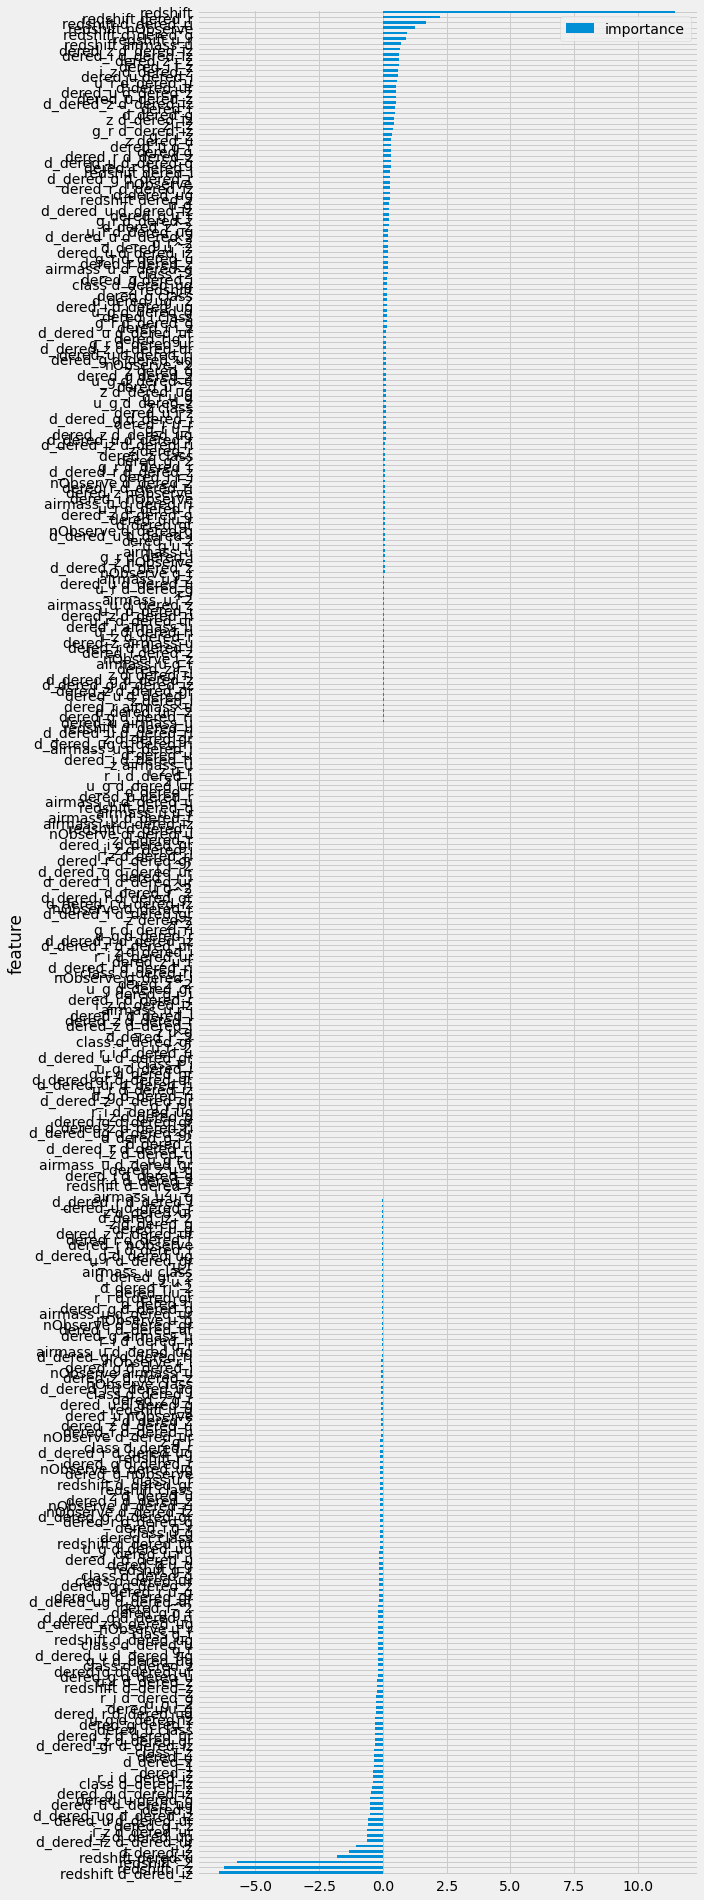

In [18]:
imp = pd.DataFrame({'feature': df.columns, 'importance': clf.coef_[1, :].T})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh', figsize=(8, 32))

In [19]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [20]:

sub[target_col] = np.argmax(p_tst, axis=1)
sub.head()

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2


In [21]:
sub[target_col].value_counts()

2    42370
0    30991
1     6639
Name: class, dtype: int64

In [22]:
sub.to_csv(sub_file)